# Unsupervised learning

**Uses of unsupervised learning**

* Finding patterns in data
* Clustering customers
* Dimension reduction (compressing the data using patterns)

Unsupervised learning algo's:
## KMeans

Finds specified number of clusters in the data. 

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

iris = datasets.load_iris()


In [4]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42,
                                                    test_size=0.2)

In [6]:
km = KMeans(n_clusters=3)
km.fit(X_train)

KMeans(n_clusters=3)

You can already see the difference upon fitting the data. We do not fit to the y_train (labels). But only to the X_train (values).

In [7]:
lables = km.predict(X_train)

In [8]:
lables

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0,
       1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 2])

Predicitng on the new data (in our case the test values) is the same as with the supervised learning models.

In [9]:
new_labels = km.predict(X_test)
new_labels


array([0, 1, 2, 0, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 2, 2, 2, 1, 1])

We can evaluate model performance by using scatter plots:

In [20]:
xs = X_test[:, 0] # Selecting sepal length - 0th column
ys = X_test[:, 2] # Selecintg petal length - 2nd column

In [11]:
xs

array([4.6, 5.7, 6.7, 4.8, 4.4, 6.3, 6.4, 5.2, 5. , 5.2, 5.8, 6. , 6.7,
       5.4, 5.4, 5.5, 6.3, 6.4, 6.6, 7.2, 5.7, 7.6, 5.6, 5.1, 7.7, 5.8,
       5.2, 5. , 5.1, 5. , 6.3, 4.8, 5. , 5.1, 5.6, 5.1, 5.7, 7.7, 4.6,
       6.2, 5.7, 5.5, 6. , 5.8, 6. , 5.4, 6.2, 5.5, 5.4, 5. , 6.4, 5. ,
       5. , 5.5, 6.7, 4.9, 5.8, 5. , 5. , 5.9, 5.1, 6.9, 6. , 6.1, 7.7,
       5.5, 4.4, 4.3, 6. , 7.2, 4.6, 5.1, 4.4, 6.3, 6.3, 4.6, 6.8, 6.3,
       4.7, 6.1, 6.5, 6.2, 7. , 6.4, 5.1, 6.9, 5.9, 6.5, 5.7, 5.2, 6.1,
       4.5, 6.6, 5.5, 5.3, 5.6, 7.3, 6.7, 5.1, 4.9, 6.7, 7.2, 4.9, 6.7,
       4.9, 6.9, 7.4, 6.3, 5.7, 6.5, 6.3, 6.4, 5.6, 5.9, 5.4, 6.1, 4.9,
       5.8, 5.8, 7.1])

In [12]:
ys

array([1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4, 1.5, 5.1, 4.5, 4.7,
       1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6, 4.5, 1.4, 6.7, 4.1,
       1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2, 1.5, 4.2, 6.7, 1.4,
       4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. , 1.7, 3.3, 5.3, 1.4,
       1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8, 3. , 5.7, 5.1, 5.6, 6.1,
       4. , 1.4, 1.1, 5. , 6. , 1.5, 1.4, 1.3, 4.9, 5.6, 1.4, 5.5, 6. ,
       1.3, 4.7, 4.6, 4.8, 4.7, 5.3, 1.6, 5.4, 4.2, 5.2, 3.5, 3.9, 4.6,
       1.3, 4.6, 4.4, 1.5, 4.1, 6.3, 5.7, 1.5, 3.3, 5.7, 5.8, 1.4, 5.6,
       1.4, 4.9, 6.1, 5.6, 4.1, 5.5, 4.4, 4.3, 4.9, 5.1, 1.7, 4. , 4.5,
       1.2, 4. , 5.9])

In [21]:
centroids = km.cluster_centers_
centroids

array([[5.85686275, 2.73137255, 4.38627451, 1.44313725],
       [4.99      , 3.4525    , 1.45      , 0.245     ],
       [6.85517241, 3.10344828, 5.70689655, 2.02068966]])

In [22]:
centroids_X = centroids[:,0]
centroids_y = centroids[:,1]
centroids_X

array([5.85686275, 4.99      , 6.85517241])

In [23]:
centroids_y

array([2.73137255, 3.4525    , 3.10344828])

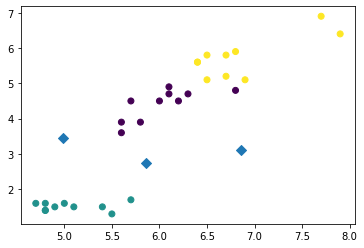

In [25]:
plt.scatter(xs, ys, c=new_labels)
plt.scatter(centroids_X, centroids_y, marker='D', s=50)
plt.show()

## Clustering evaluation